In [42]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [ ]:
# ================  Generate an imbalanced dataset =================
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=10,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],  # Imbalance: 90% class 0, 10% class 1
    flip_y=0,
    random_state=42
)


X

array([[-0.206424  , -2.50924283, -3.0085936 , ...,  2.59614116,
         1.13304495,  4.40454032],
       [ 6.8065615 , -4.58701449, -2.11112697, ...,  3.74968763,
         2.17728445,  1.72610517],
       [ 7.97633395, -7.68673227, -4.67486214, ...,  7.69918637,
         2.07814044,  3.79971249],
       ...,
       [ 1.0553466 ,  5.38349142,  0.39173612, ..., -1.49380112,
        -3.13918943, -4.32750305],
       [ 1.88963004,  2.20006092, -0.26323798, ...,  4.72815526,
        -0.99475296,  4.60053487],
       [ 7.78441952,  2.58135974,  2.92111599, ...,  3.52770746,
         2.73148647, -0.12967405]])

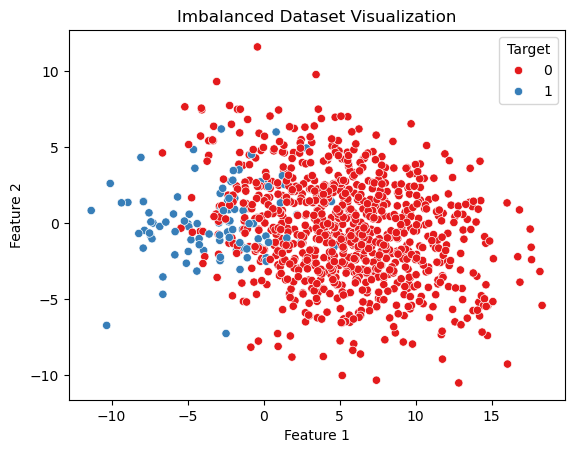

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.DataFrame(X[:, :2], columns=['Feature 1', 'Feature 2'])
df['Target'] = y  # Add target column


sns.scatterplot(data=df, x='Feature 1', y='Feature 2', hue='Target', palette='Set1')
plt.title('Imbalanced Dataset Visualization')
plt.show()



In [49]:
from collections import Counter
Counter(y)

Counter({0: 900, 1: 100})

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       180
           1       0.83      1.00      0.91        20

    accuracy                           0.98       200
   macro avg       0.92      0.99      0.95       200
weighted avg       0.98      0.98      0.98       200

Confusion Matrix:
 [[176   4]
 [  0  20]]


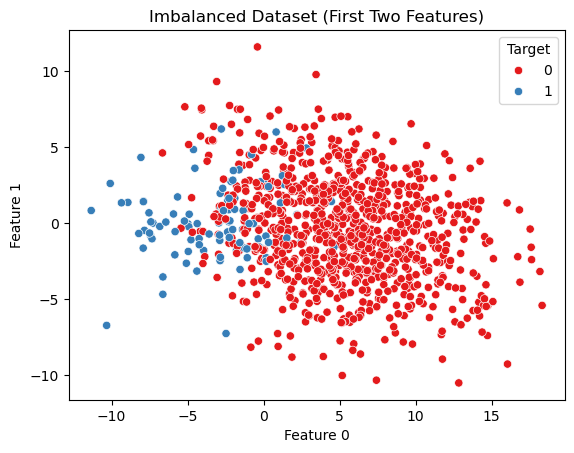

In [ ]:
from sklearn.metrics import f1_score


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ===================== Train Logistic Regression with class_weight ==========
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

df_viz = pd.DataFrame(X, columns=[f"Feature {i}" for i in range(X.shape[1])])
df_viz['Target'] = y
sns.scatterplot(data=df_viz, x='Feature 0', y='Feature 1', hue='Target', palette='Set1')
plt.title("Imbalanced Dataset (First Two Features)")
plt.show()

In [ ]:
import itertools
from sklearn.metrics import f1_score

# ===================Define weights to try================
weights_values = [1, 10, 50, 100]
weight_pairs = list(itertools.product(weights_values, repeat=2))

# ================== all combinations of class weights================
for w0, w1 in weight_pairs:
    weights = {0: w0, 1: w1}
    model = LogisticRegression(class_weight=weights, max_iter=1000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    print(f"{str(weights):<20} {f1:.4f}")


{0: 1, 1: 1}         0.9500
{0: 1, 1: 10}        0.9091
{0: 1, 1: 50}        0.9091
{0: 1, 1: 100}       0.8889
{0: 10, 1: 1}        0.9189
{0: 10, 1: 10}       0.9500
{0: 10, 1: 50}       0.9524
{0: 10, 1: 100}      0.9302
{0: 50, 1: 1}        0.8571
{0: 50, 1: 10}       0.9231
{0: 50, 1: 50}       0.9500
{0: 50, 1: 100}      0.9756
{0: 100, 1: 1}       0.8235
{0: 100, 1: 10}      0.9189
{0: 100, 1: 50}      0.9500
{0: 100, 1: 100}     0.9500


In [ ]:
import itertools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold


X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    n_classes=2,
    random_state=42
)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Class weight combinations (generated using itertools)
weights_values = [1, 10, 50, 100]
class_weights = [{0: w0, 1: w1} for w0, w1 in itertools.product(weights_values, repeat=2)]

# =================  Define the hyperparameter grid using dict()================
c_values = [0.01, 0.1, 1, 10]
penalty_values = ['l1', 'l2']
solver_values = ['liblinear']  # liblinear supports both 'l1' and 'l2'

# ================ Generate the parameter grid dictionary ===============
param_grid = dict(
    C=c_values,
    penalty=penalty_values,
    solver=solver_values,
    class_weight=class_weights
)

# ================== Define Logistic Regression model =================
model = LogisticRegression(max_iter=1000)

# 7. Stratified K-Fold cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# ================= Perform Grid Search with cross-validation ================
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=cv,  # Stratified K-Fold cross-validation
    scoring='accuracy',  # You can change this to 'f1' or other metrics
    n_jobs=-1,  # Use all available CPUs
    verbose=1  # Display grid search progress
)

# ===================== Fit the grid search ==================
grid_search.fit(X_train, y_train)

# 10. Get the best model and evaluate it
best_model = grid_search.best_estimator_

# ==============Make predictions on the test set===============
y_pred = best_model.predict(X_test)


print("Best Hyperparameters:", grid_search.best_params_)
print("Classification Report:")
print(classification_report(y_test, y_pred))



# ==========Check the predicted class distribution on the test set===============
print("\nPredicted class distribution on the test set:")
print(Counter(y_pred))


Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Hyperparameters: {'C': 0.01, 'class_weight': {0: 10, 1: 10}, 'penalty': 'l1', 'solver': 'liblinear'}
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       102
           1       0.77      0.87      0.82        98

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.81       200
weighted avg       0.81      0.81      0.81       200


Predicted class distribution on the test set:
Counter({1: 110, 0: 90})


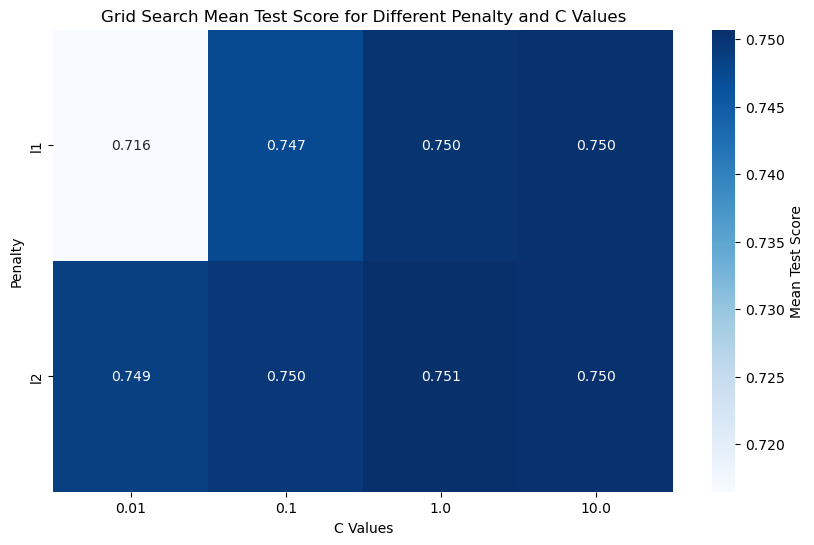

In [ ]:
# ===============Extract the results from the grid search================
results = grid_search.cv_results_

# =======================Convert results to a pandas DataFrame=============
results_df = pd.DataFrame(results)

#============== Create a pivot table for better visualization=================
pivot_df = results_df.pivot_table(
    values='mean_test_score', 
    index='param_penalty', 
    columns='param_C', 
    aggfunc='mean'
)


plt.figure(figsize=(10, 6))
sns.heatmap(pivot_df, annot=True, cmap="Blues", fmt=".3f", cbar_kws={'label': 'Mean Test Score'})
plt.title("Grid Search Mean Test Score for Different Penalty and C Values")
plt.xlabel("C Values")
plt.ylabel("Penalty")
plt.show()